In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#function to combine picks and point values
def combine(df1):
    my_file = df1.copy()
    rows = my_file.shape[0]
    i = 2 
    while i < rows:
        for col in my_file.loc[:, my_file.columns != 'Game']:
            my_file[col][i+1] = float(my_file[col][i+1])
            my_file[col][i] = [my_file[col][i], my_file[col][i+1]]
        i = i+2
    
    my_file.drop([5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41], axis=0, inplace=True)
    return my_file

#function to calculate totals
def totals(df):
    max_score = 0
    games = len(df.columns)-1
    points = 16
    while games > 0:
        max_score = max_score + points
        points = points - 1
        games = games - 1
    i = 4  
    df['Score'] = 0
    df['Game Count'] = 0
    df['Max Score'] = max_score
    while i < 41:
        for col in df.loc[:, ~df.columns.isin(['Game', 'Score', 'Game Count', 'Max Score'])]:
            if df[col][0] is np.nan:
                break
            
            elif df[col][0] == df[col][i][0]:
                df.loc[i, 'Game Count'] = df.loc[i, 'Game Count'] + 1
                df.loc[i, 'Score'] = df.loc[i, 'Score'] + df.loc[i, col][1]
            
            else:  
                df.loc[i, 'Max Score'] = df.loc[i, 'Max Score'] - df.loc[i, col][1]
               
        i = i + 2
    return df

#upset counter
def upset_counter(df):
    upset_count = 0
    fav_count = 0
    tie_count = 0
    dog_spread_tot = 0
    for col in df.loc[:, ~df.columns.isin(['Game', 'Score', 'Max Score'])]:
        if df[col][3] < 0 and df[col][1] == df[col][0]: #if home team is favorite and away team won
            upset_count = upset_count + 1
            dog_spread_tot = dog_spread_tot + -(df[col][3])
            #print('Road upset alert ', df[col][0], "spread ", -(df[col][3]))
        elif df[col][3] > 0 and df[col][2][0] == df[col][0]: #if away team is favorite and home team won
            upset_count = upset_count + 1
            dog_spread_tot = dog_spread_tot + df[col][3]
            #print('Home dog win ', df[col][2])
        elif df[col][0] == "TIE":
            tie_count = tie_count + 1
            #print("A friggen tie...  ", df[col][2])
        else:
            fav_count = fav_count + 1
    
    dog_spread_avg = dog_spread_tot/upset_count
    #print("Total of ", upset_count, "upsets this week")
    return upset_count, dog_spread_avg #fav_count, tie_count

def num_picks(df):
    games = len(df.axes[1])-1
    enteries = (len(df.axes[0])-4)/2
    total_picks = games * enteries
    return total_picks


In [41]:
week1_raw = pd.read_csv("week1_results.csv")
week2_raw = pd.read_csv("Week2_results.csv")
week3_raw = pd.read_csv("week3_results.csv")
week4_raw = pd.read_csv("week4_results.csv")
week5_raw = pd.read_csv("Week5_results.csv")
week6_raw = pd.read_csv("week6_results.csv")

week1 = combine(week1_raw)
week2 = combine(week2_raw)
week3 = combine(week3_raw)
week4 = combine(week4_raw)
week5 = combine(week5_raw)
week6 = combine(week6_raw)

week1_tot = totals(week1)
week2_tot = totals(week2)
week3_tot = totals(week3)
week4_tot = totals(week4)
week5_tot = totals(week5)
week6_tot = totals(week6)


week1_stats = week1_tot[['Game', 'Score', 'Game Count']][4:]
week2_stats = week2_tot[['Game', 'Score', 'Game Count']][4:]
week3_stats = week3_tot[['Game', 'Score', 'Game Count']][4:]
week4_stats = week4_tot[['Game', 'Score', 'Game Count']][4:]
week5_stats = week5_tot[['Game', 'Score', 'Game Count', 'Max Score']][4:]
week6_stats = week6_tot[['Game', 'Score', 'Game Count', 'Max Score']][4:]




In [42]:
week6_stats['Week 6 Rank'] = week6_stats['Score'].rank(ascending=False)
week6_stats.sort_values(['Max Score'], ascending=False).head()

,Game,Score,Game Count,Max Score,Week 6 Rank
34,Team Boylan,90,10,96,1.0
32,taz7611,83,8,86,2.0
14,Ken,79,8,85,3.0
38,Wild Bill,66,8,79,5.0
18,Lizzy_Z,61,7,72,6.5


In [43]:
#upset count week 1
upset_count1 = upset_counter(week1)
upset_count2 = upset_counter(week2)
upset_count3 = upset_counter(week3)
upset_count4 = upset_counter(week4)
upset_count5 = upset_counter(week5)
upset_count6 = upset_counter(week6)


In [44]:
#find season totals 
season_totals = week1_stats[['Score', 'Game Count']] + week2_stats[['Score', 'Game Count']] + week3_stats[['Score', 'Game Count']] + week4_stats[['Score', 'Game Count']] + week5_stats[['Score', 'Game Count']] + week6_stats[['Score', 'Game Count']]
season_totals = season_totals.rename(columns={'Score': 'Season Points Total', 'Game Count': 'Season Total Game Count'})

season_totals = season_totals.set_index(week1_stats['Game'])
season_totals.sort_values(['Season Total Game Count'], ascending=False).head()

,Season Points Total,Season Total Game Count
Game,,
Bob Z,486,61
Zapp,462,56
Kathy Zwartz,453,54
Ken,484,54
Lindsey,450,54


   Week  Total Points  Total Game Count  Pick Percentage  Upset count
0   1.0        1170.0             158.0            51.97          6.0
1   2.0        1457.0             161.0            52.96          5.0
2   3.0        1297.0             152.0            50.00          9.0
3   4.0        1536.0             175.0            57.57          5.0
4   5.0        1714.0             188.0            61.84          4.0
5   6.0        1093.0             124.0            46.62          7.0


Text(0.5, 0, 'Week')

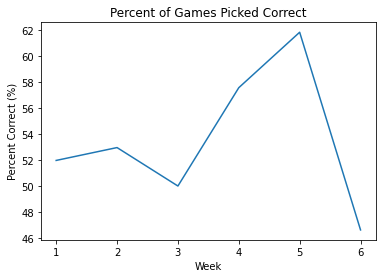

In [45]:
tots = {'Week': 1, 'Total Points': week1_stats['Score'].sum(), 'Total Game Count': week1_stats['Game Count'].sum(), 'Pick Percentage': round(week1_stats['Game Count'].sum()/num_picks(week1_raw)*100, 2), 'Upset count': upset_count1[0]}
weekly_totals = pd.DataFrame(tots, index=[0])
weekly_totals.loc[len(weekly_totals.index)] = [2, week2_stats['Score'].sum(), week2_stats['Game Count'].sum(), round(week2_stats['Game Count'].sum()/num_picks(week2_raw)*100, 2), upset_count2[0]] 
weekly_totals.loc[len(weekly_totals.index)] = [3, week3_stats['Score'].sum(), week3_stats['Game Count'].sum(), round(week3_stats['Game Count'].sum()/num_picks(week3_raw)*100, 2), upset_count3[0]] 
weekly_totals.loc[len(weekly_totals.index)] = [4, week4_stats['Score'].sum(), week4_stats['Game Count'].sum(), round(week4_stats['Game Count'].sum()/num_picks(week4_raw)*100, 2), upset_count4[0]] 
weekly_totals.loc[len(weekly_totals.index)] = [5, week5_stats['Score'].sum(), week5_stats['Game Count'].sum(), round(week5_stats['Game Count'].sum()/num_picks(week5_raw)*100, 2), upset_count5[0]] 
weekly_totals.loc[len(weekly_totals.index)] = [6, week6_stats['Score'].sum(), week6_stats['Game Count'].sum(), round(week6_stats['Game Count'].sum()/num_picks(week6_raw)*100, 2), upset_count6[0]] 
print(weekly_totals)

plt.plot(weekly_totals['Week'], weekly_totals['Pick Percentage'])
plt.title('Percent of Games Picked Correct')
plt.ylabel('Percent Correct (%)')
#plt.ylim([25, 75])
plt.xlabel("Week")